# Bron–Kerbosch Algorithm (No Pivot)

## 1. Purpose
- Finds **all maximal cliques** in an undirected graph.  
- A **clique** = a set of vertices where every pair is connected.  
- A **maximal clique** = a clique that cannot be extended by adding another vertex.  


## 2. State Variables
At each recursive call, the algorithm keeps three sets:
- `R`: current clique being built.  
- `P`: candidate vertices that can still extend `R`.  
- `X`: excluded vertices (already processed).  

**Base case**:  
If `P` and `X` are both empty → output `R` (it is a maximal clique).  


## 3. Pseudocode (No Pivot)
```text
BK(R, P, X):
  if P and X are both empty:
    report R as a maximal clique
  for each v in P:
    BK(R ∪ {v}, P ∩ N(v), X ∩ N(v))
    P := P \ {v}
    X := X ∪ {v}


# Example Graph
Vertices: ${1, 2, 3, 4, 5}$

Edges: $(1–2), (1–3), (2–3), (3–4)$

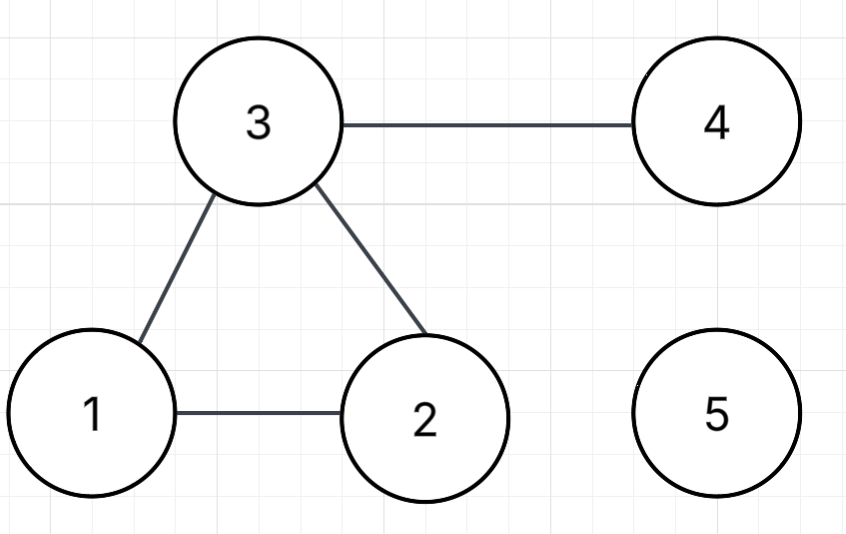


$$
N(1) = {2,3} \\
N(2) = {1,3} \\
N(3) = {1,2,4} \\
N(4) = {3} \\
N(5) = \phi \\
$$

```text
R. |. P.         | X
(∅ | {1,2,3,4,5} | ∅)
├─ choose v=1
│  └─ ({1} | {2,3} | ∅)
│     ├─ choose v=2
│     │  └─ ({1,2} | {3} | ∅)
│     │     └─ choose v=3
│     │        └─ ({1,2,3} | ∅ | ∅)  → Maximal {1,2,3}
│     │
│     └─ choose v=3
│        └─ ({1,3} | ∅ | {2})        
│
├─ choose v=2
│  └─ ({2} | {3} | {1})
│     └─ choose v=3
│        └─ ({2,3} | ∅ | {1})        
│
├─ choose v=3
│  └─ ({3} | {4} | {1,2})
│     └─ choose v=4
│        └─ ({3,4} | ∅ | ∅)          → Maximal {3,4}
│
├─ choose v=4
│  └─ ({4} | ∅ | {3})                
│
└─ choose v=5
   └─ ({5} | ∅ | ∅)                  → Maximal {5}


# Bron–Kerbosch Algorithm with Pivoting

## 1. Why Pivoting?
- The **simple version** explores every vertex in `P`, which can branch too much.  
- **Pivoting** improves efficiency:
  - Choose a **pivot vertex u** from `P ∪ X`.  
  - Only consider vertices in `P \ N(u)` (non-neighbors of u) as branching candidates.  

**Intuition:**  
If u is a pivot, then every maximal clique must contain either:
- u itself, or  
- a non-neighbor of u.  

Thus we only need to branch on `P \ N(u)`.

## 2. Pivoting Version Pseudocode

```text
BK(R, P, X):
  if P and X are empty:
    report R
  choose a pivot u ∈ P ∪ X
  for each v in P \ N(u):
    BK(R ∪ {v}, P ∩ N(v), X ∩ N(v))
    P := P \ {v}
    X := X ∪ {v}


## 2. How to Choose the Pivot?
The goal is to **minimize the number of recursive branches** (size of `P \ N(u)`).  
Several strategies exist:

### (a) **Greedy degree heuristic (most common)**
- Choose `u` with the **largest neighborhood inside P**.  
- Intuition: if `u` has many neighbors in `P`, then `P \ N(u)` is small, so fewer branches.  
- This is the strategy used in **Tomita’s algorithm (2006)**, one of the fastest BK variants.


### (b) **Arbitrary pivot**
- Pick any `u ∈ P ∪ X`.  
- Still correct, but performance may suffer because `P \ N(u)` could be large.  



### (c) **Max-degree in `P ∪ X`**
- Sometimes implementations pick `u` with maximum degree overall (not just inside `P`).  
- This reduces branching but may not always be optimal compared to (a).

### (d) **Random pivot**
- Pick `u` randomly.  
- Useful in parallel/distributed implementations to balance workload.  
- Average case is okay, but not as good as heuristic (a).

```text
Root: (∅ | {1,2,3,4,5} | ∅), pivot=3
 └─ v=5 → ({5} | ∅ | ∅) →  Maximal {5}

Root: (∅ | {1,2,3,4} | {5}), pivot=1
 └─ v=4 → ({4} | {3} | ∅)
      └─ v=3 → ({4,3} | ∅ | ∅) → Maximal {3,4}

Root: (∅ | {1,2,3} | {4,5}), pivot=1
 └─ v=1 → ({1} | {2,3} | ∅)
      └─ v=2 → ({1,2} | {3} | ∅)
           └─ v=3 → ({1,2,3} | ∅ | ∅) → maximal {1,2,3}


# Bron–Kerbosch by Deletion 

## 1. Core Idea
- Start with `C = V` (all vertices).  
- A maximal clique must survive **removal of non-neighbors of a pivot**.  
- Instead of *adding* vertices to a growing clique `R`, we *remove* vertices from a shrinking set `C`.  
- Each recursive step eliminates vertices that cannot coexist in a clique.  


## 2. Pseudocode (Deletion with Pivoting)

```text
BK-Deletion(C, F):
  if C is a clique and no vertex in F can extend it:
    report C
  else:
    choose pivot u ∈ C ∪ F         # usually with max degree in C
    for each v ∈ C \ N(u):         # only remove non-neighbors of pivot
        BK-Deletion(C \ {v}, F ∪ {v})

# Comparison: BK-Deletion (with Pivoting) vs BK (Tomita’s Pivoting)

| Aspect | BK-Deletion (Pivoting) | BK-Add-One (Pivoting, Tomita) |
|--------|-------------------------|-------------------------------|
| **Search style** | Start with all vertices `C=V` and **remove vertices** until a clique remains. | Start with empty clique `R=∅` and **add vertices** one by one to grow cliques. |
| **State tracking** | `(C,F)` = candidate set, forbidden set. | `(R,P,X)` = current clique, candidate set, excluded set. |
| **Pivoting** | Choose pivot `u ∈ C ∪ F`; only branch on `C \ N(u)` (non-neighbors of pivot). | Choose pivot `u ∈ P ∪ X`; only branch on `P \ N(u)` (non-neighbors of pivot). |
| **Clique check** | Must verify if `C` is a clique after removals. | Clique property preserved automatically by `P ∩ N(v)` at each step. |
| **Pruning** | Less immediate: extra vertices may stay in `C` until explicitly removed. | Strong pruning: candidates shrink instantly (`P ∩ N(v)`). |
| **Duplicates** | Must carefully track `F` (forbidden) to avoid repeating cliques. | Built-in `X` ensures each clique is output once, naturally. |
| **Theoretical complexity** | Same output-sensitive bound as Tomita: O(3^(n/3)) worst-case, but efficient with pivoting. | Same: O(3^(n/3)), optimal worst-case, very efficient in practice. |


# Choosing Between BK-Deletion vs BK-Add-One

## 1. Key Difference
- **BK-Add-One (Tomita)**:  
  - Strong pruning early, because every extension step shrinks `P` via intersection with neighbors.  
  - Typically better on **sparse graphs** where candidate sets shrink quickly.

- **BK-Deletion (Pivoting)**:  
  - Keeps more vertices in `C` until removals are forced.  
  - Sometimes better on **dense graphs** where nearly all vertices are neighbors and fewer removals are needed.


## 2. Graph Properties That Matter

### (a) **Density (edge probability)**
- **Sparse graphs (low density)**:  
  - Many vertices not connected, pruning via `P ∩ N(v)` in Add-One is powerful.  
  -  Add-One BK is usually faster.  
- **Dense graphs (high density, near-cliques)**:  
  - Many vertices share neighbors → deletion may shrink more quickly to cliques.  
  -  Deletion BK may be competitive.



### (b) **Degree distribution**
- **Graphs with skewed degrees (e.g., scale-free / social networks)**:  
  - Add-One with pivot chooses high-degree pivot, reduces branching dramatically.  
  -  Add-One wins.
- **Graphs with uniform high degree**:  
  - Deletion explores fewer “bad removals.”  
  -  Deletion may help.

### (c) **Graph size vs clique structure**
- **Many small cliques** (typical in sparse networks): Add-One efficient.  
- **Few very large cliques** (dense subgraphs): Deletion may cut faster.

# Graph Features for Choosing Clique Algorithms (BK Add-One vs Deletion)


## 1. Structural Features

### • Number of vertices and edges
- **n = |V|** (vertices), **m = |E|** (edges).  
- Larger n,m → bigger search space.

### • Density (ρ)
$ρ = \frac{2m}{n(n-1)}$
- Ratio of existing edges to possible edges.  
- ρ close to 0 → sparse graph (Add-One better).  
- ρ close to 1 → dense graph (Deletion may compete).

### • Degree statistics
- **Average degree** = 2m / n.  
- **Max degree** = maximum degree of any vertex.  
- **Variance** = spread of degrees.  
- Skewed degrees → Add-One pivoting is strong.  
- Uniform degrees → Deletion might help.

### • Degeneracy (k-core number)
- Highest k such that graph has a k-core (all vertices in subgraph have degree ≥ k).  
- $\Omega(G) ≤ k+1$ (bound on max clique).  
- Low degeneracy → sparse graph → Add-One efficient.  
- High degeneracy → dense → Deletion may help.

### • Clustering coefficient
For vertex v:
$CC(v) = \frac{\text{edges among N(v)}}{\binom{\deg(v)}{2}}$
- Global CC = average of CC(v).  
- High CC → neighbors form cliques → harder.  
- Low CC → fewer cliques → Add-One faster.

### • Graph diameter / average path length
- Diameter = longest shortest path.  
- Average path = mean shortest distance.  
- Small diameter → dense, many cliques (Deletion).  
- Large diameter → sparse (Add-One).

### • Triangle count / wedge count
- **Triangle** = 3-cycle.  
- **Wedge** = path of length 2.  
- Ratio (triangles/wedges) = **transitivity**.  
- High triangle density → more cliques → Take mopre time in both cases.



## 2. Clique-Specific Indicators

### • Upper bound on ω (max clique size)
- Exact ω is NP-hard, but bounds exist:
  - Greedy: repeatedly add highest-degree neighbors.  
  - Coloring bound: χ(G) ≥ ω(G).   
- Large ω → dense structure → Deletion may help.  
- Small ω → sparse → Add-One is faster.

### • Distribution of common neighbor set sizes
- For each (u,v), compute |N(u) ∩ N(v)|.  
- Shows how “clique-friendly” neighborhoods are.  
- Large overlaps → dense → Deletion.  
- Small overlaps → sparse → Add-One.

### • Edge density inside neighborhoods
- For each vertex v, compute density of induced subgraph on N(v).  
- High neighborhood density → many cliques → Takes more time or both.  

## 3. Derived Features

### • Max degree / Avg degree ratio
- High ratio = skewed degree distribution → Add-One pivoting benefits.  

### • Skewness of degree distribution
- Heavy-tailed (scale-free) → Add-One wins.  
- Uniform (dense ER graph) → Deletion may help.

### • Fraction of isolated nodes
- Isolated nodes = trivial cliques of size 1.  
- Many isolated → sparse graph → Add-One efficient.

